In [1]:
# Plotting Script- ESTA Dissolution Model Comparsion

In [2]:
# Import
import pandas as pd
from pathlib import Path
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt
import math as math

dir_code = '~/projects/MINER/src'
import sys
sys.path.append(dir_code)

##### Functions to read PFLOTRAN pft and tec files ######
def read_pflotran_output(fname):
    '''Function for reading the pflotran output'''
    header = pd.read_csv(fname, nrows=0)        
    data   = pd.read_csv(fname, sep='\s+', skiprows=1, names=list(header))
    data.index = data.iloc[:,0]
    return data

######################
def tec_to_dataframe(file_path, no_skiprow, column_headers):
    '''function to convert a tec PFLOTRAN outfile to a dataframe'''

    df = pd.read_csv(file_path, skiprows=no_skiprow, delim_whitespace=True, header=None, names=column_headers)
    return df
#####################

In [3]:
### 1.0 Import Experimental Data
dir_data = Path('./')
f_obs_diss = os.path.join(dir_data, 'Diss_EDTA_data.xlsx')

# Read the observation data
diss_obs = pd.read_excel(f_obs_diss)
time_obs = diss_obs['Time [hr]']


In [4]:
# List Aqueous Species for Comparision
aq_species = ['Ni', 'Fe', 'Mn', 'Mg', 'Ca']


In [5]:
### 2.0 Post-Process PFLOTRAN outputs to match experimental data format
# Simulation Results
####### Path to folder locations
dir_model = Path('./')
#f_out = './pflotran-obs-0.pft'
f_out = './pflotran_prev_EDTA_fit-obs-0.pft'
pf_out = read_pflotran_output(f_out)
header_short = []
headers = pf_out.columns
for i in range(len(headers)):
    header_short.append(headers[i].split(' pt')[0])
pf_out.columns = header_short

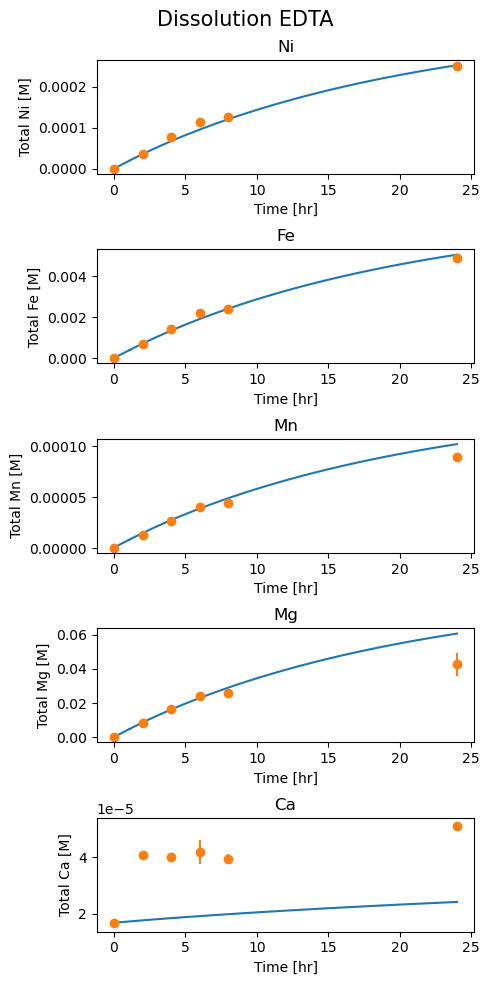

In [6]:
# Plotting Aqueous Chemistry
n_row = len(aq_species)
fig, ax = plt.subplots(n_row, 1, figsize = (5,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

model_output_headers = ["Total Ni++ [M]","Total Fe++ [M]","Total Mn++ [M]","Total Mg++ [M]","Total Ca++ [M]"]

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aq_species):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(model_output_headers[j])])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('Total {} [M]'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
# plot observations
    if name != 'pH':
        filtered_obs = diss_obs.filter(like = '{}'.format(name))
        x_data = time_obs
        y_data = filtered_obs.iloc[:,0]
        error = filtered_obs.iloc[:,1]
        ax[j].errorbar(x_data, y_data, yerr = error, marker='o', linestyle = 'none')
plt.tight_layout()

fig.suptitle('Dissolution EDTA', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()

# Nickel

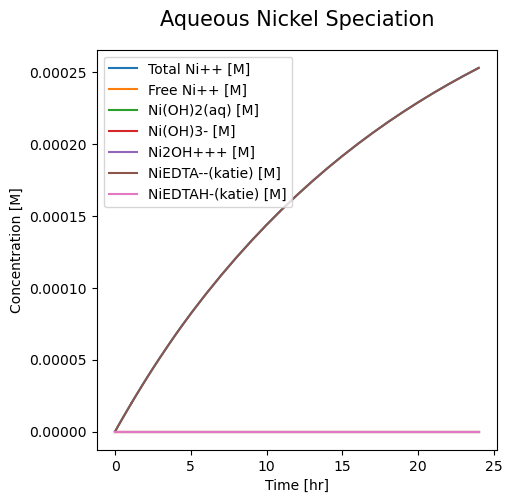

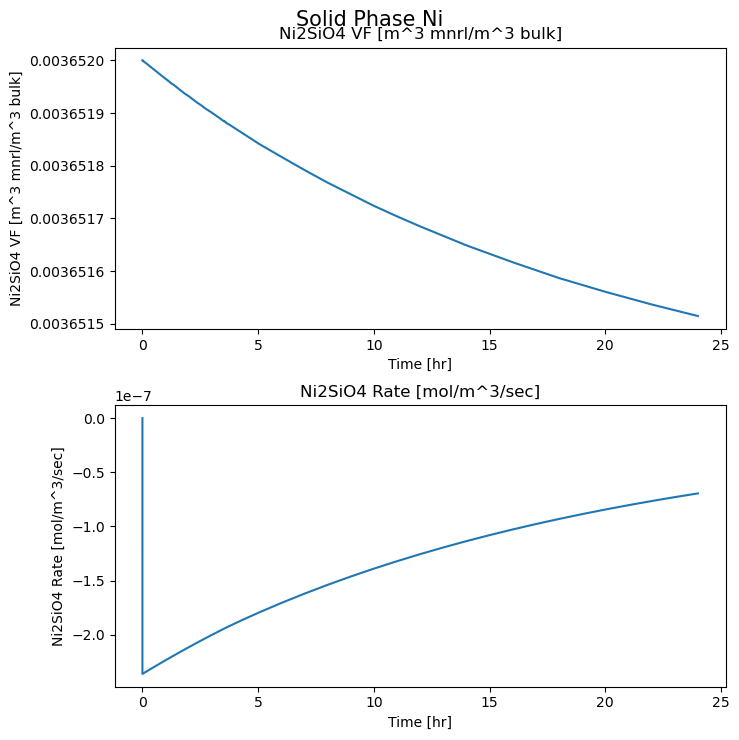

In [7]:
# Aqueous Speciation Plots- Nickel
n_row = len(aq_species)
fig, ax = plt.subplots(1, 1, figsize = (5,5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

aqueous_headers = ["Total Ni++ [M]",\
                   "Free Ni++ [M]", \
                   "Ni(OH)2(aq) [M]",\
                   "Ni(OH)3- [M]", \
                   "Ni2OH+++ [M]",\
                   "NiEDTA--(katie) [M]",\
                   "NiEDTAH-(katie) [M]"]

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aqueous_headers):
    # plot simulation results
    plt.plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(aqueous_headers [j])],label='{}'.format(aqueous_headers [j]))
    plt.ylabel('Concentration [M]')
    plt.xlabel('Time [hr]')
    
fig.suptitle('Aqueous Nickel Speciation', fontsize = 15)
plt.legend()
plt.show()

# Plotting Solid Phase - Nickel - this will break with multiple minerals- will deal with later
solid_VF_headers = ["Ni2SiO4 VF [m^3 mnrl/m^3 bulk]"]
soild_rates_headers = ["Ni2SiO4 Rate [mol/m^3/sec]"]

n_row = len(solid_VF_headers)
fig, ax = plt.subplots(2, 1, figsize = (7.5,7.5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(solid_VF_headers):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('{}'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
for j, name in enumerate(soild_rates_headers):        
    # plot simulation results
    ax[j+1].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j+1].set_title('{}'.format(name))
    ax[j+1].set_ylabel('{}'.format(name))
    ax[j+1].set_xlabel('Time [hr]')
plt.tight_layout()

fig.suptitle('Solid Phase Ni', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()


# IRON

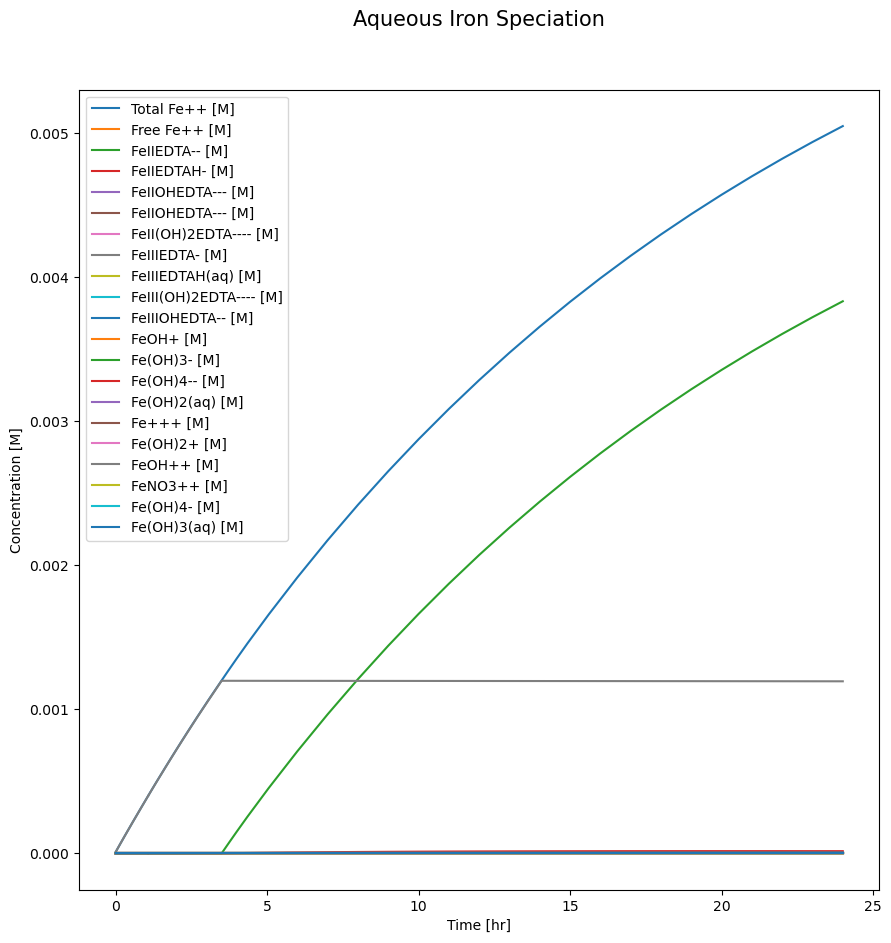

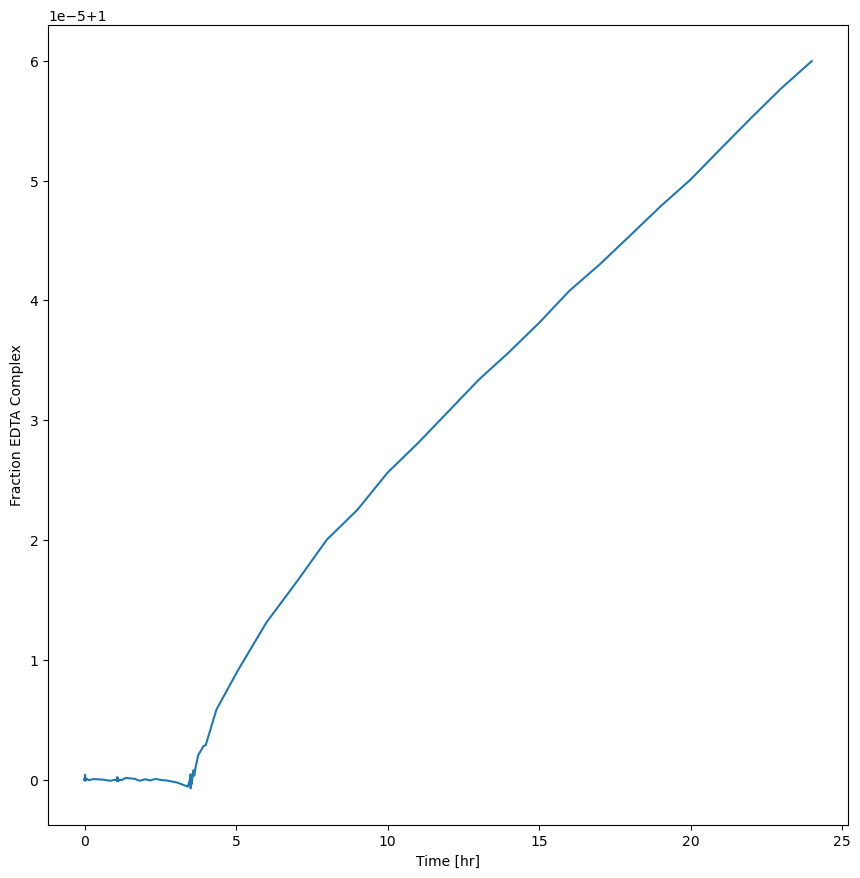

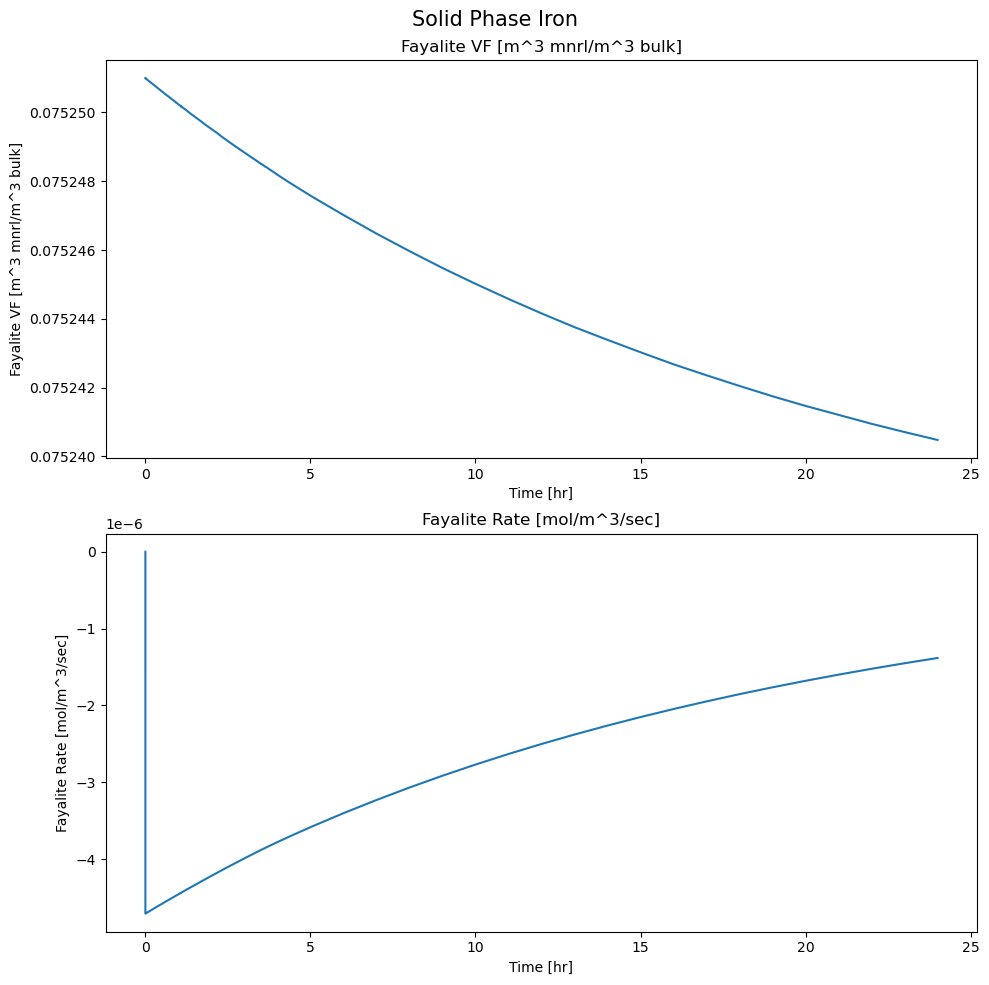

In [8]:
# Aqueous Speciation Plots- Iron
n_row = len(aq_species)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

aqueous_headers = ["Total Fe++ [M]","Free Fe++ [M]","FeIIEDTA-- [M]","FeIIEDTAH- [M]","FeIIOHEDTA--- [M]", \
   "FeIIOHEDTA--- [M]", "FeII(OH)2EDTA---- [M]", "FeIIIEDTA- [M]","FeIIIEDTAH(aq) [M]","FeIII(OH)2EDTA---- [M]", \
  "FeIIIOHEDTA-- [M]", "FeOH+ [M]", "Fe(OH)3- [M]","Fe(OH)4-- [M]","Fe(OH)2(aq) [M]", \
  "Fe+++ [M]","Fe(OH)2+ [M]","FeOH++ [M]","FeNO3++ [M]","Fe(OH)4- [M]","Fe(OH)3(aq) [M]"]

# Sum EDTA complexes for info on % as free vs complexed
EDTA_headers = ["FeIIEDTA-- [M]","FeIIEDTAH- [M]","FeIIOHEDTA--- [M]", \
   "FeIIOHEDTA--- [M]", "FeII(OH)2EDTA---- [M]", "FeIIIEDTA- [M]", \
                "FeIIIEDTAH(aq) [M]","FeIII(OH)2EDTA---- [M]", "FeIIIOHEDTA-- [M]"]

pf_out['EDTA_complex'] = pf_out[EDTA_headers].sum(axis=1)
pf_out['frac_EDTA_complex'] = pf_out['EDTA_complex'] / pf_out['Total Fe++ [M]']

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aqueous_headers):
    # plot simulation results
    plt.plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(aqueous_headers [j])],label='{}'.format(aqueous_headers [j]))
    plt.ylabel('Concentration [M]')
    plt.xlabel('Time [hr]')
    
fig.suptitle('Aqueous Iron Speciation', fontsize = 15)
plt.legend(loc=0)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.plot(pf_out[' "Time [hr]"'],pf_out['frac_EDTA_complex'])
plt.ylabel('Fraction EDTA Complex')
plt.xlabel('Time [hr]')

# Plotting Solid Phase - Nickel - this will break with multiple minerals- will deal with later
solid_VF_headers = ["Fayalite VF [m^3 mnrl/m^3 bulk]"]
soild_rates_headers = ["Fayalite Rate [mol/m^3/sec]"]

n_row = len(solid_VF_headers)
fig, ax = plt.subplots(2, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(solid_VF_headers):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('{}'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
for j, name in enumerate(soild_rates_headers):        
    # plot simulation results
    ax[j+1].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j+1].set_title('{}'.format(name))
    ax[j+1].set_ylabel('{}'.format(name))
    ax[j+1].set_xlabel('Time [hr]')
plt.tight_layout()

fig.suptitle('Solid Phase Iron', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()


# Mn

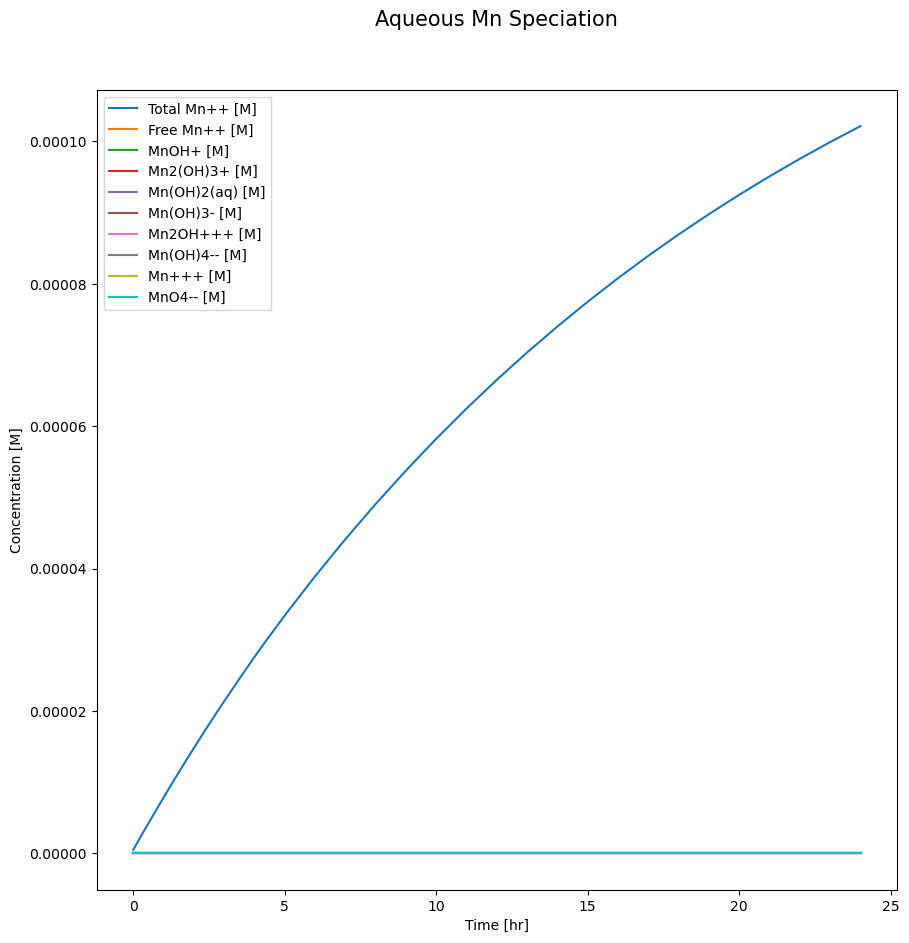

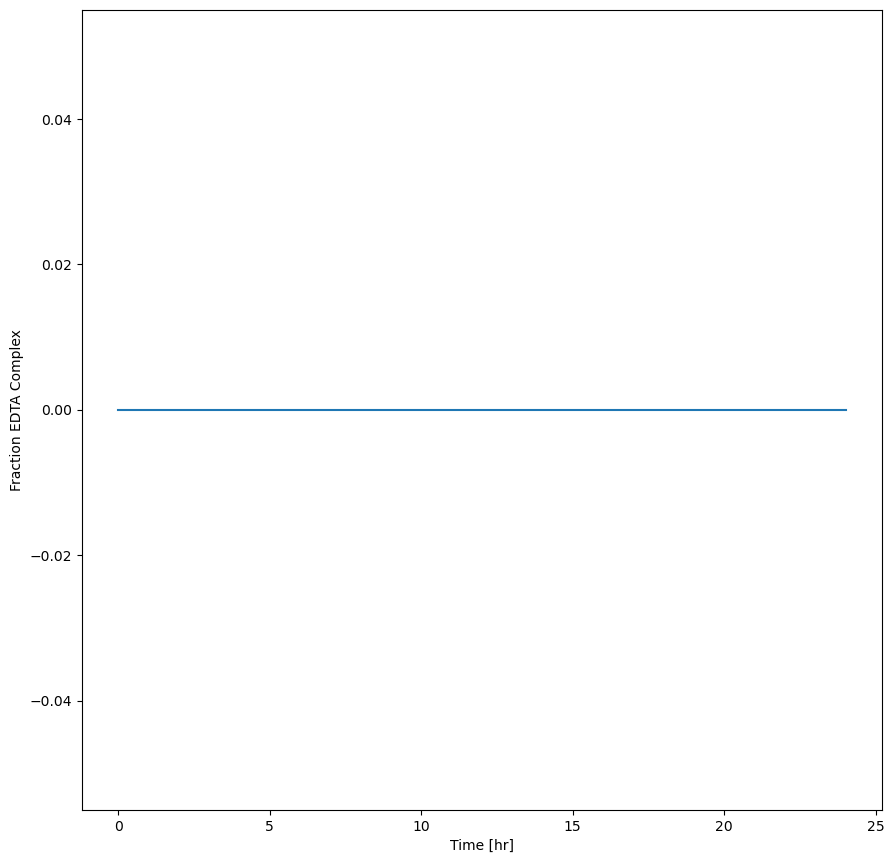

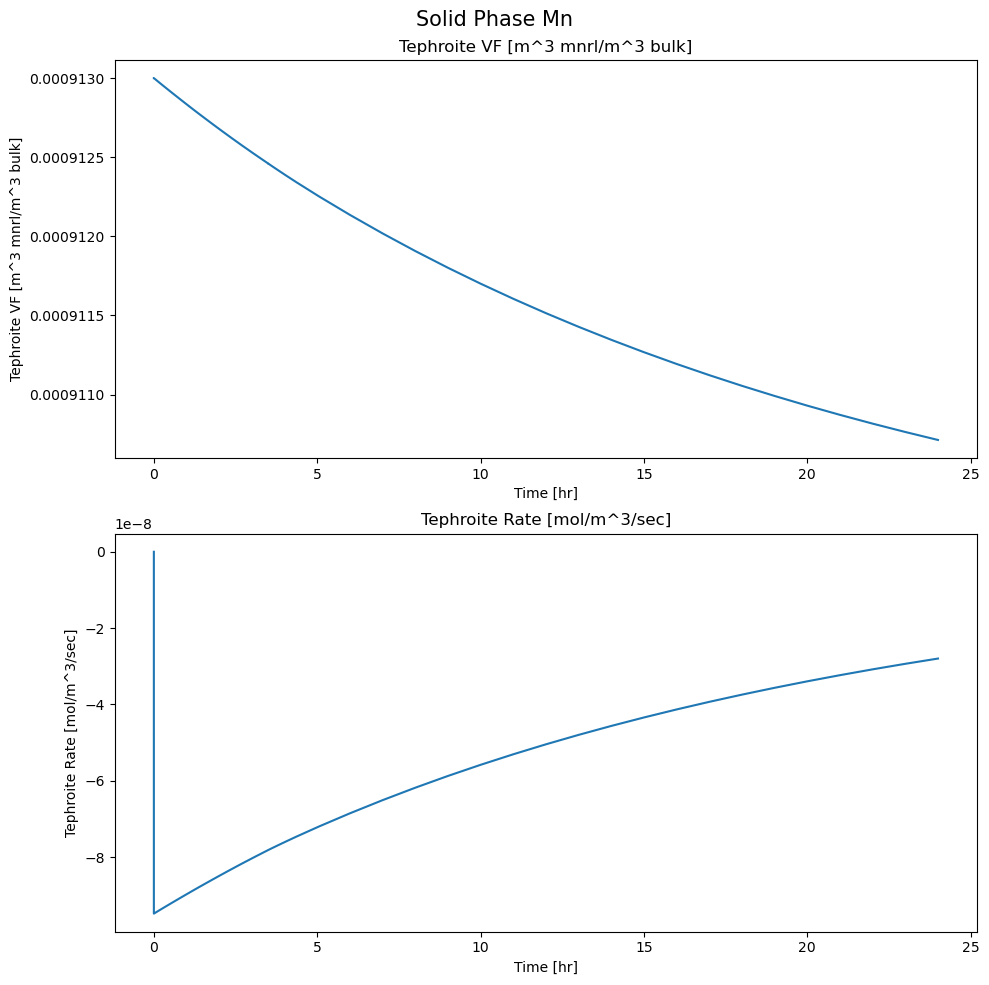

In [9]:
# Aqueous Speciation Plots- Mn
n_row = len(aq_species)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

aqueous_headers = ["Total Mn++ [M]",\
                   "Free Mn++ [M]", \
                   "MnOH+ [M]",\
                   "Mn2(OH)3+ [M]", \
                   "Mn(OH)2(aq) [M]", \
                   "Mn(OH)3- [M]",\
                   "Mn2OH+++ [M]",\
                  "Mn(OH)4-- [M]",\
                   "Mn+++ [M]", \
                   "MnO4-- [M]"]

# Sum EDTA complexes for info on % as free vs complexed
EDTA_headers = []

pf_out['EDTA_complex'] = pf_out[EDTA_headers].sum(axis=1)
pf_out['frac_EDTA_complex'] = pf_out['EDTA_complex'] / pf_out['Total Mn++ [M]']

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aqueous_headers):
    # plot simulation results
    plt.plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(aqueous_headers [j])],label='{}'.format(aqueous_headers [j]))
    plt.ylabel('Concentration [M]')
    plt.xlabel('Time [hr]')
    
fig.suptitle('Aqueous Mn Speciation', fontsize = 15)
plt.legend(loc=0)
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.plot(pf_out[' "Time [hr]"'],pf_out['frac_EDTA_complex'])
plt.ylabel('Fraction EDTA Complex')
plt.xlabel('Time [hr]')


# Plotting Solid Phase - Mn - this will break with multiple minerals- will deal with later
solid_VF_headers = ["Tephroite VF [m^3 mnrl/m^3 bulk]"]
soild_rates_headers = ["Tephroite Rate [mol/m^3/sec]"]

n_row = len(solid_VF_headers)
fig, ax = plt.subplots(2, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(solid_VF_headers):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('{}'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
for j, name in enumerate(soild_rates_headers):        
    # plot simulation results
    ax[j+1].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j+1].set_title('{}'.format(name))
    ax[j+1].set_ylabel('{}'.format(name))
    ax[j+1].set_xlabel('Time [hr]')
plt.tight_layout()

fig.suptitle('Solid Phase Mn', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()


# Mg

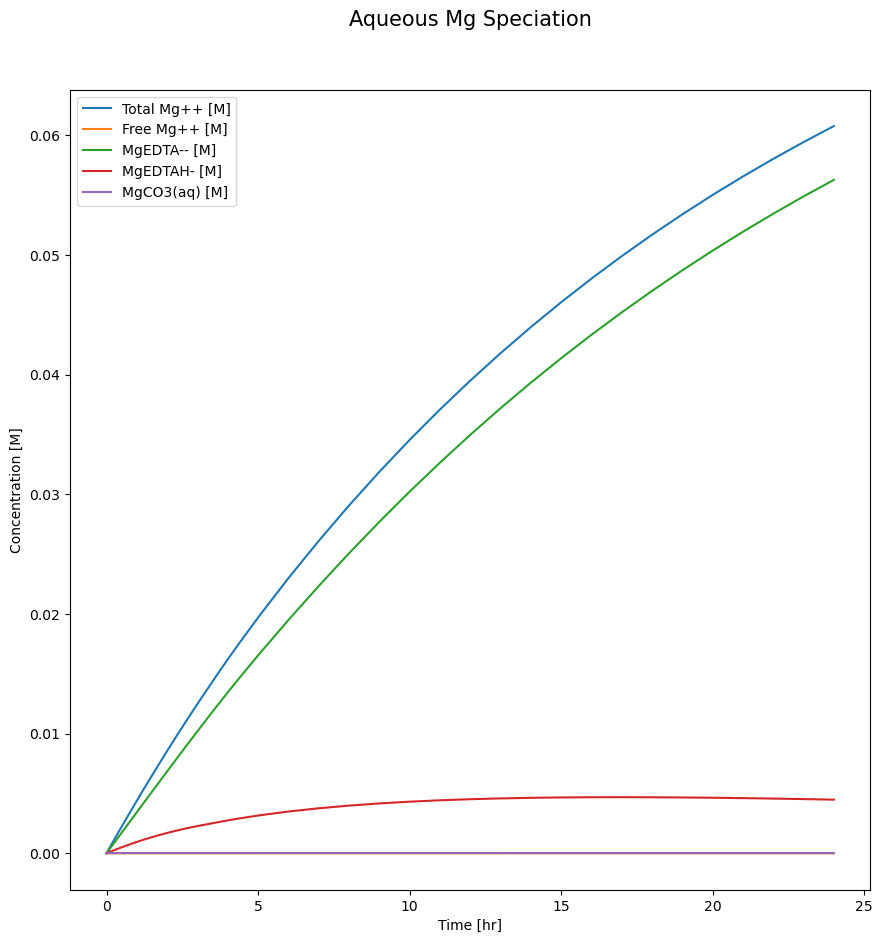

IndexError: index 2 is out of bounds for axis 0 with size 2

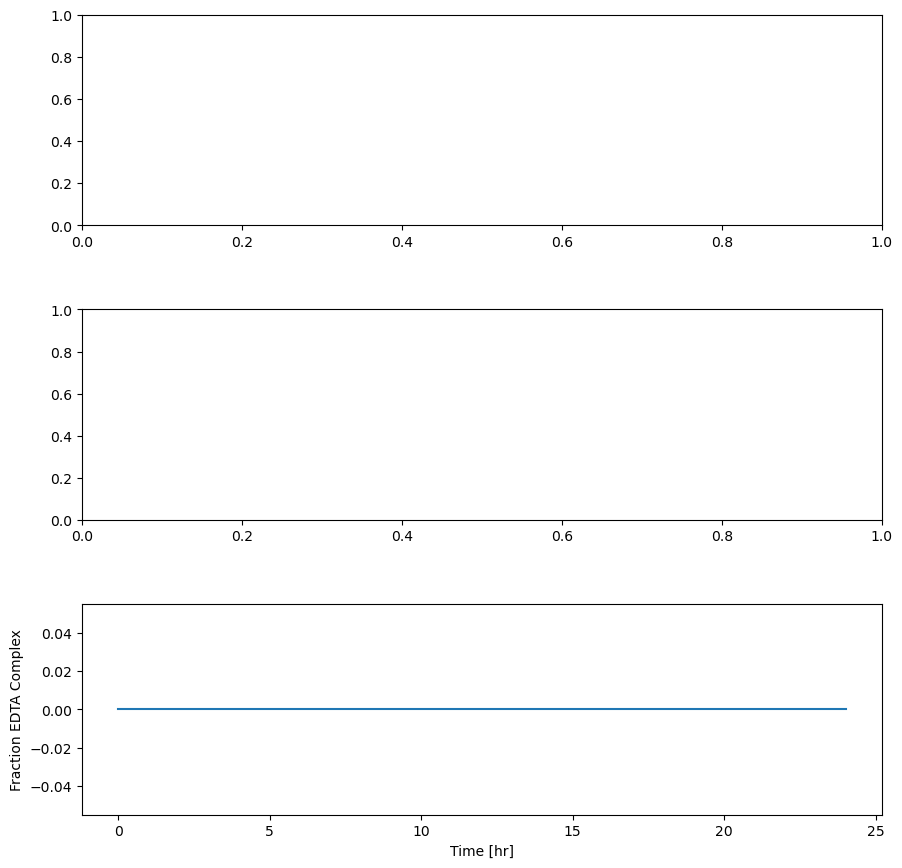

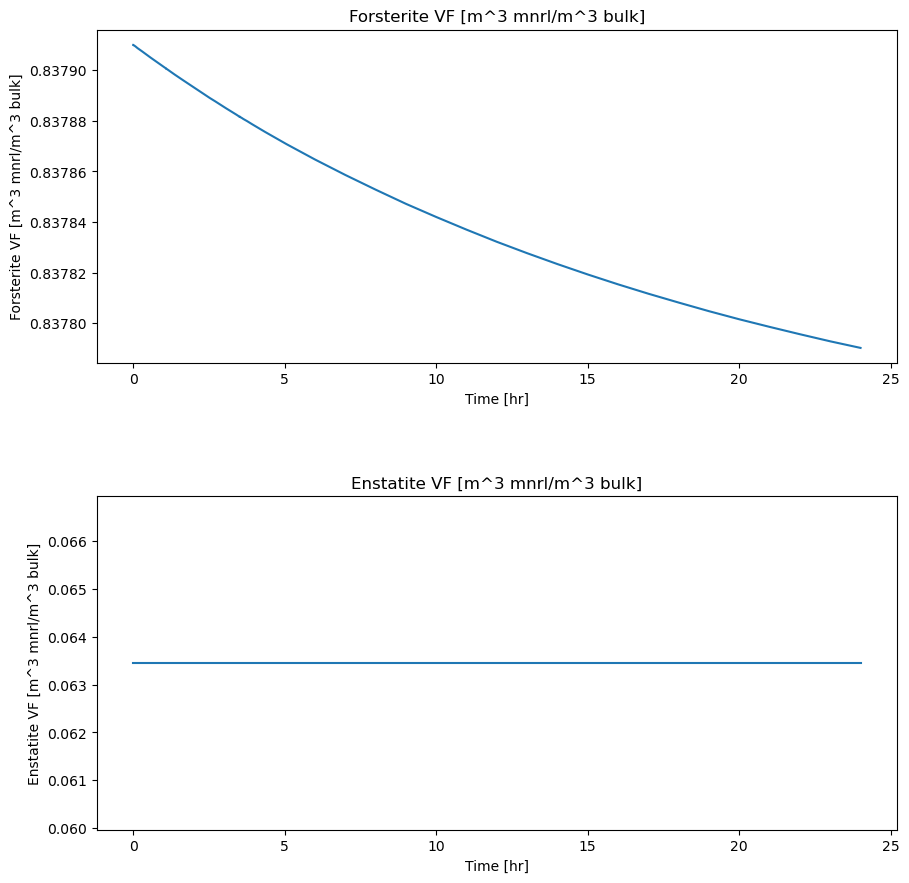

In [10]:
# Aqueous Speciation Plots- Mg
n_row = len(aq_species)
fig, ax = plt.subplots(1, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

aqueous_headers = ["Total Mg++ [M]","Free Mg++ [M]", \
                   "MgEDTA-- [M]","MgEDTAH- [M]", \
                   "MgCO3(aq) [M]"]

# Sum EDTA complexes for info on % as free vs complexed
EDTA_headers = []

pf_out['EDTA_complex'] = pf_out[EDTA_headers].sum(axis=1)
pf_out['frac_EDTA_complex'] = pf_out['EDTA_complex'] / pf_out['Total Mg++ [M]']

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aqueous_headers):
    # plot simulation results
    plt.plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(aqueous_headers [j])],label='{}'.format(aqueous_headers [j]))
    plt.ylabel('Concentration [M]')
    plt.xlabel('Time [hr]')
    
fig.suptitle('Aqueous Mg Speciation', fontsize = 15)
plt.legend(loc=0)
plt.show()

fig, ax = plt.subplots(3, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.plot(pf_out[' "Time [hr]"'],pf_out['frac_EDTA_complex'])
plt.ylabel('Fraction EDTA Complex')
plt.xlabel('Time [hr]')


# Plotting Solid Phase - Mn - this will break with multiple minerals- will deal with later
solid_VF_headers = ["Forsterite VF [m^3 mnrl/m^3 bulk]", \
                   "Enstatite VF [m^3 mnrl/m^3 bulk]", \
                   "Chrysotile VF [m^3 mnrl/m^3 bulk]"]

soild_rates_headers = ["Forsterite Rate [mol/m^3/sec]", \
                       "Enstatite Rate [mol/m^3/sec]", \
                      "Chrysotile Rate [mol/m^3/sec]" ]

n_row = len(solid_VF_headers)
fig, ax = plt.subplots(2, 1, figsize = (10,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(solid_VF_headers):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('{}'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
for j, name in enumerate(soild_rates_headers):        
    # plot simulation results
    ax[j+1].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(name)])
    ax[j+1].set_title('{}'.format(name))
    ax[j+1].set_ylabel('{}'.format(name))
    ax[j+1].set_xlabel('Time [hr]')
plt.tight_layout()

fig.suptitle('Solid Phase Mg', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()


# Ca